In [0]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
import IPython
%matplotlib inline

In [0]:
def wave_generator(rate=6000, sec=5) -> np.ndarray(np.dtype('float64')):
    # ドレミファソラシの音階リスト
    scale_list = [261.626, 293.665, 329.628, 349.228, 391.995, 440.000, 493.883]
    wave_types = ["sin","saw","square"]
    
    f0 = scale_list[2]#random.choice(scale_list)
    wave_type = wave_types[0]#random.choice(wave_types)
    wave = np.zeros((rate*sec,), dtype=np.float64)
    
    if(wave_type == "sin"):
        for i in range(rate*sec):
            s = np.sin(2.0 * np.pi * f0 * i / rate)
            wave[i] = s
        return wave
    
    elif(wave_type == "saw"):
        for i in range(rate*sec):
            s = 2.0*(f0*i/rate - np.floor(f0*i/rate + 1/2.0))
            wave[i] = s
        return wave
    
    elif(wave_type == "square"):
        K = 30
        for i in range(rate*sec):
            s = 0.
            for j in range(1,K):
                s +=  np.sin((2*j - 1) *2.0 * np.pi * f0 * i / rate) / (2*j - 1)

            s = (4.0/np.pi) * s
            s = np.clip(s, -1.0, 1.0)
            wave[i] = s
        return wave

In [0]:
X_wav = wave_generator(rate=12000, sec=1)

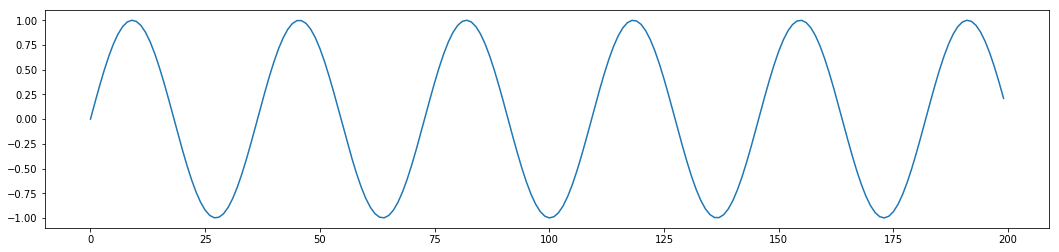

In [4]:
plt.figure(figsize=[18,4])
plt.plot(X_wav[:200],'-',ms=1)

In [5]:
import IPython
IPython.display.display(IPython.display.Audio(data=X_wav, rate=12000))

In [0]:
noise_map = 0.05*np.random.normal(size=X_wav.shape)
X_noise = X_wav + noise_map

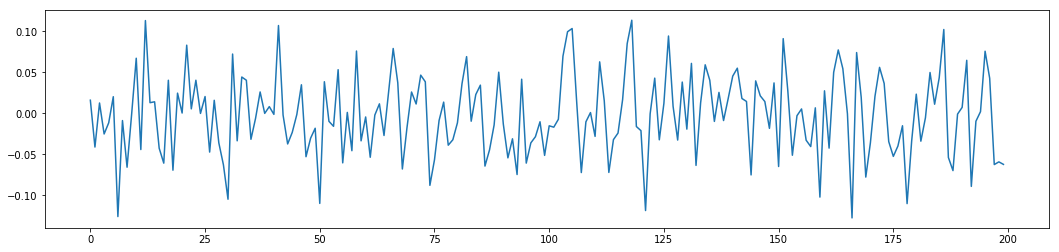

In [7]:
plt.figure(figsize=[18,4])
plt.plot(noise_map[:200],'-',ms=1)

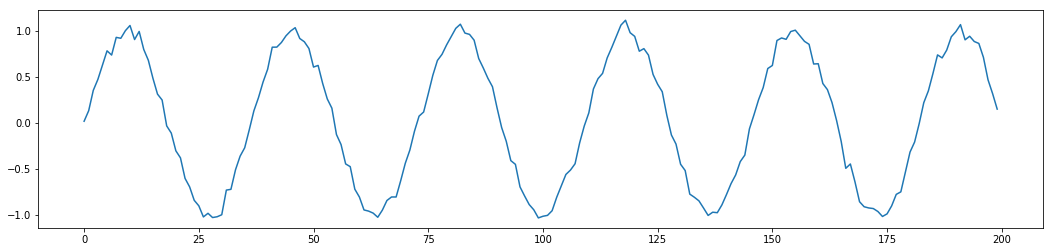

In [8]:
plt.figure(figsize=[18,4])
plt.plot(X_noise[:200],'-',ms=1)

In [9]:
IPython.display.display(IPython.display.Audio(data=X_noise, rate=12000))

In [0]:
# 標準偏差と平均求めて標準化の逆の操作をする
X_noise_tmp = X_noise.copy()
K= 10
for i in range(0,len(X_noise_tmp), K):
    local_wav= X_noise_tmp[i:i+K]
    local_wav_mean = np.mean(local_wav)
    local_wav_std = np.std(local_wav)
    
    X_noise_tmp[i:i+K] = (X_noise_tmp[i:i+K] * local_wav_std) + local_wav_mean

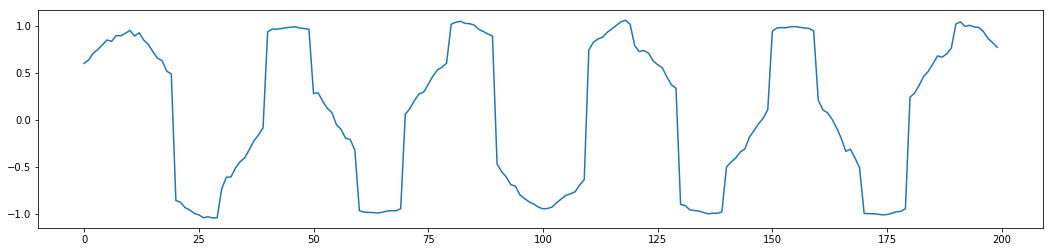

In [11]:
plt.figure(figsize=[18,4])
plt.plot(X_noise_tmp[:200],'-',ms=1)

In [12]:
IPython.display.display(IPython.display.Audio(data=X_noise_tmp, rate=12000))

In [0]:
#フーリエ変換する
N = 256

X_tmp = X_wav.copy()
FFT_orig_wav = np.zeros(X_wav.shape) + 0j

for t in range(len(FFT_orig_wav)):
    p = 0.
    for x in range(N):
        p += X_tmp[x]*np.exp(-2j*np.pi*t*x/N)
    FFT_orig_wav[t] = p
        
X_noise_tmp = X_noise.copy()
FFT_noise_wav = np.zeros(X_noise_tmp.shape) + 0j

for t in range(len(FFT_noise_wav)):
    p = 0.
    for x in range(N):
        p += X_noise_tmp[x]*np.exp(-2j*np.pi*t*x/N)
    FFT_noise_wav[t] = p

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


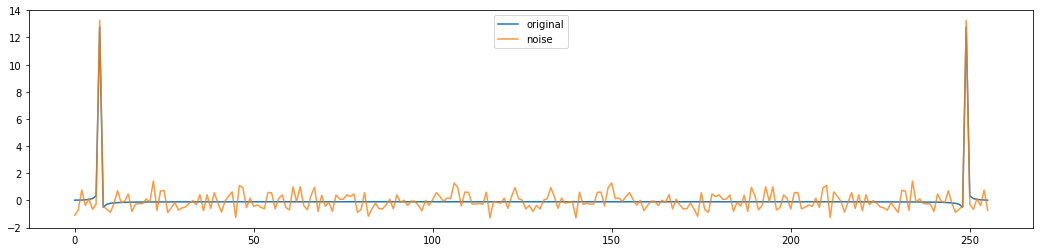

In [14]:
plt.figure(figsize=[18,4])
plt.plot(FFT_orig_wav[:256],'-',ms=1,label='original')
plt.plot(FFT_noise_wav[:256],'-',ms=1,label='noise',alpha=0.8)
plt.legend()

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


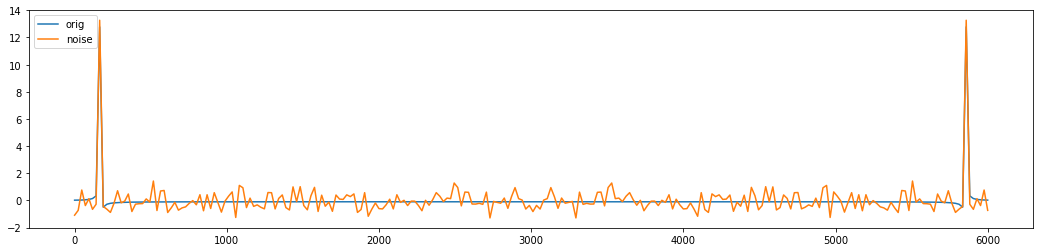

In [15]:
x_scale = np.linspace(0,12000/2,N)
plt.figure(figsize=[18,4])
plt.plot(x_scale,FFT_orig_wav[:N],'-',ms=1,label='orig')
plt.plot(x_scale,FFT_noise_wav[:N],'-',ms=1,label='noise')
plt.legend()

In [0]:
#振幅に低い値のものをカットする
FFT_noise_wav_tmp = FFT_noise_wav.copy()

constant_x = np.mean(FFT_noise_wav_tmp[10:240])
for i in range(len(FFT_noise_wav_tmp)):
    if(FFT_noise_wav[i]< -2 or FFT_noise_wav[i] < 2):
        FFT_noise_wav_tmp[i] = constant_x

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


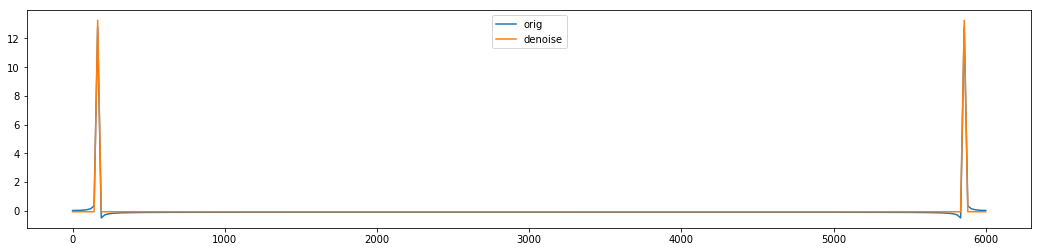

In [17]:
x_scale = np.linspace(0,12000/2,N)
plt.figure(figsize=[18,4])
plt.plot(x_scale,FFT_orig_wav[:N],'-',ms=1,label='orig')
plt.plot(x_scale,FFT_noise_wav_tmp[:N],'-',ms=1,label='denoise')
plt.legend()

In [0]:
#逆フーリエ変換する
N = 256

fft_noise_tmp = FFT_noise_wav_tmp.copy()
IFFT_noise_wav = np.zeros(fft_noise_tmp.shape) + 0j

for t in range(len(IFFT_noise_wav)):
    p = 0.
    for x in range(N):
        p += fft_noise_tmp[x]*np.exp(2j*np.pi*t*x/N)
    IFFT_noise_wav[t] = p
    
IFFT_noise_wav = IFFT_noise_wav/N

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


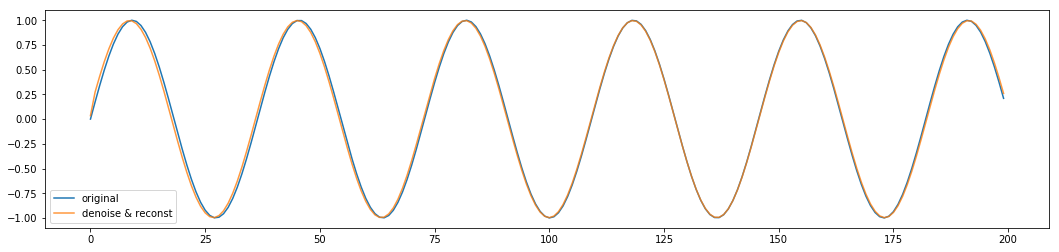

In [19]:
plt.figure(figsize=[18,4])
plt.plot(X_wav[:200],'-',ms=1,label='original')
plt.plot(IFFT_noise_wav[:200],'-',ms=1,label='denoise & reconst',alpha=0.8)
plt.legend()

In [20]:
IPython.display.display(IPython.display.Audio(data=IFFT_noise_wav, rate=12000))

/usr/local/lib/python3.6/dist-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


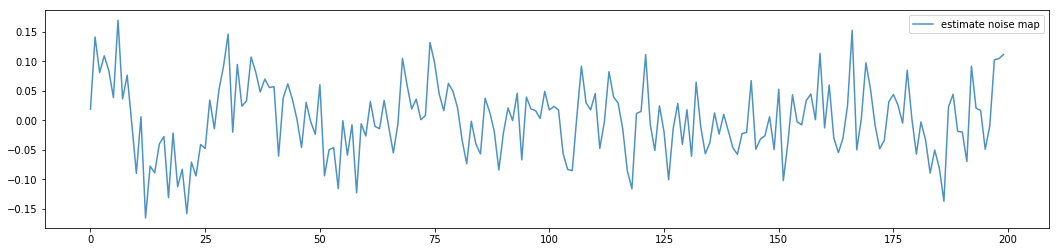

In [21]:
plt.figure(figsize=[18,4])
plt.plot(IFFT_noise_wav[:200]-X_noise[:200],'-',ms=1,label='estimate noise map',alpha=0.8)
plt.legend()